In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets

# Check library versions
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)


PyTorch Version: 2.5.0+cpu
Torchvision Version: 0.20.0+cpu


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [3]:
# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Check the size of the datasets
print(f'Train dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')


Train dataset size: 60000
Test dataset size: 10000


In [4]:
# Specify the batch size
batch_size = 128  # Increased batch size

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Check the number of batches in the training and test loaders
print(f'Number of batches in train loader: {len(train_loader)}')
print(f'Number of batches in test loader: {len(test_loader)}')


Number of batches in train loader: 469
Number of batches in test loader: 79


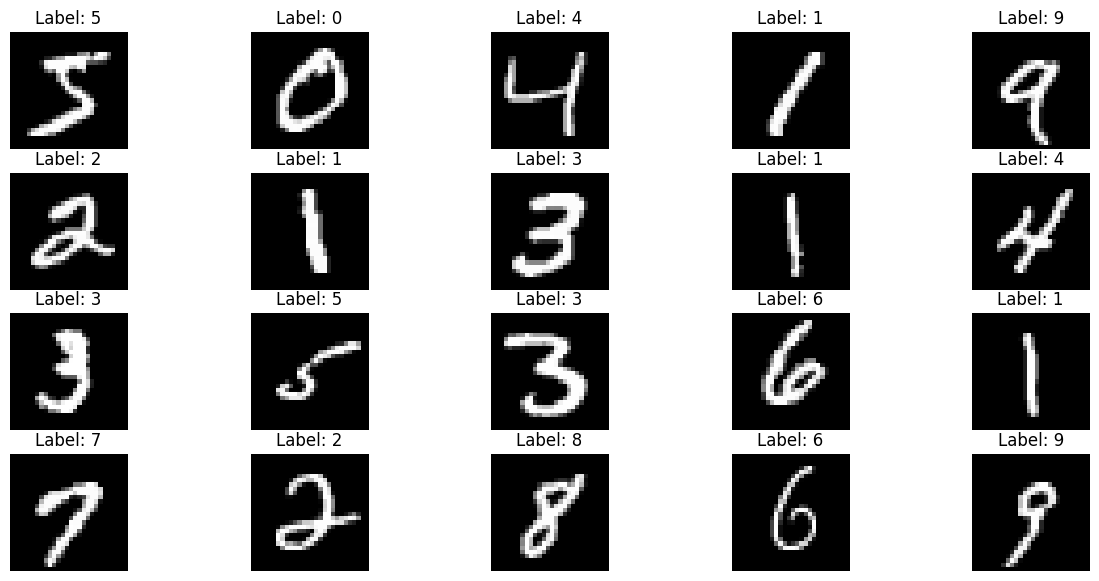

In [5]:
# Function to visualize samples from the dataset
def visualize_samples(dataset, num_samples=20):  # Change num_samples to 20
    plt.figure(figsize=(15, 7))  # Adjusted figure size for better visibility
    for i in range(num_samples):
        plt.subplot(4, 5, i + 1)  # Adjust the subplot grid to accommodate 20 images
        image, label = dataset[i]
        plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Visualize some samples
visualize_samples(train_dataset)


In [6]:
from torch.utils.data import DataLoader

# Create DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check the number of batches in the training and test loaders
print(f'Number of batches in train loader: {len(train_loader)}')
print(f'Number of batches in test loader: {len(test_loader)}')


Number of batches in train loader: 938
Number of batches in test loader: 157


In [7]:
# Step 5: Define a Multi-Layer Perceptron (MLP)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # First hidden layer
        self.fc2 = nn.Linear(256, 128)       # Second hidden layer
        self.fc3 = nn.Linear(128, 64)        # Third hidden layer
        self.fc4 = nn.Linear(64, 10)         # Output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # First activation
        x = torch.relu(self.fc2(x))  # Second activation
        x = torch.relu(self.fc3(x))  # Third activation
        x = self.fc4(x)  # Output layer
        return x

# Instantiate the model
model = MLP()
print(model)



MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
# Define loss function and optimizer
import torch.optim as optim  # Import the optim module for optimizers

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5  # Define the number of epochs

for epoch in range(num_epochs):
    running_loss = 0.0  # Track loss for each epoch
    correct = 0  # Track the number of correct predictions
    total = 0  # Track the total number of samples processed
    
    for i, (images, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Add the loss to running total
        running_loss += loss.item()

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)  # Update total samples
        correct += (predicted == labels).sum().item()  # Update correct predictions

        # Print statistics every 100 mini-batches
        if (i + 1) % 100 == 0:  # Example: print every 100 batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    # Calculate and print the accuracy for the epoch
    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}] completed. Average Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')

print("Training complete.")


Epoch [1/5], Batch [100/938], Loss: 0.5757
Epoch [1/5], Batch [200/938], Loss: 0.3563
Epoch [1/5], Batch [300/938], Loss: 0.4173
Epoch [1/5], Batch [400/938], Loss: 0.1529
Epoch [1/5], Batch [500/938], Loss: 0.2772
Epoch [1/5], Batch [600/938], Loss: 0.3256
Epoch [1/5], Batch [700/938], Loss: 0.1119
Epoch [1/5], Batch [800/938], Loss: 0.1234
Epoch [1/5], Batch [900/938], Loss: 0.2445
Epoch [1/5] completed. Average Loss: 0.3680, Accuracy: 88.52%
Epoch [2/5], Batch [100/938], Loss: 0.1969
Epoch [2/5], Batch [200/938], Loss: 0.0997
Epoch [2/5], Batch [300/938], Loss: 0.0722
Epoch [2/5], Batch [400/938], Loss: 0.1401
Epoch [2/5], Batch [500/938], Loss: 0.2420
Epoch [2/5], Batch [600/938], Loss: 0.1920
Epoch [2/5], Batch [700/938], Loss: 0.1953
Epoch [2/5], Batch [800/938], Loss: 0.1033
Epoch [2/5], Batch [900/938], Loss: 0.0706
Epoch [2/5] completed. Average Loss: 0.1573, Accuracy: 95.08%
Epoch [3/5], Batch [100/938], Loss: 0.0870
Epoch [3/5], Batch [200/938], Loss: 0.1080
Epoch [3/5], Bat

In [9]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to track gradients
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')


Accuracy of the model on the test dataset: 96.66%
